In [1]:
# For data processing
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
# another package for fast and beautiful plots 
import seaborn as sns
# for quick inline visualization
sns.set_theme() # use the default theme of seaborn
%matplotlib inline 

# Scikit-learn is a machine learning package
# written for python users.
# Find more information here: https://scikit-learn.org/stable/
# Here we use a dataset it provides.
from sklearn.datasets import load_boston

In [2]:
# for fast numerical operations
import numpy as np
# we use scipy.stats library for solving linear regression
from scipy.stats import linregress

# Section 1.0: Load data

In [3]:
boston_dataset = load_boston()
# print the description of the dataset
print(boston_dataset.DESCR)
# Note here, as mentioned in the description, 
# the Median Value (MEDV, attribute 14) is usually the target

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# load the independent variables
boston_df = pd.DataFrame(
    data=boston_dataset.data, 
    columns=boston_dataset.feature_names
)
# add a column for the dependent variable
# It is a convention of scikit-learn to 
# call a depenent variable, or a variable
# an algorithm is trying to predict, 
# a target variable. 
boston_df['MEDV'] = boston_dataset.target
# Have a quick view of the dataframe 
boston_df.head(n=10)
# note here if we run the head function without argument,
# 5 rows of data will be shown

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


# Section 1.1: Univariate linear regression
In this part, we solve two univariate linear regression problem with
the following two independent variables
- RM: average number of rooms per dwelling
- PTRATIO: pupil-teacher ratio by town

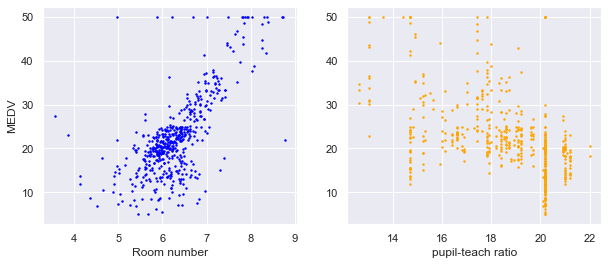

In [5]:
# Let us see whether we can get some insight into the relation between 
# the independent and dependent variables just from the plots.
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].scatter(x=boston_df['RM'], y=boston_df['MEDV'], c='blue', s=2)
axes[0].set_xlabel('Room number')
axes[0].set_ylabel('MEDV')
axes[1].scatter(x=boston_df['PTRATIO'], y=boston_df['MEDV'], c='orange', s=2)
axes[1].set_xlabel('pupil-teach ratio')
plt.show()
# Observations:
# 1. The prices increase as the value of RM increases linearly with some some outliers
# 2. The prices decrease as the the puple-teach ration increase, but the relation
# is much more scattered. 

## Section 1.1.1: Calculating the analytic solutions for coefficient $a$ and bias $b$
Since we are fitting a single line, $a$ is also called slope and $b$, intercept 

In [6]:
# Now let us use the analytic formula for a and b to 
# solve the univariate linear regression
def get_coef_bias(xs, ys):
    x_sum = sum(xs)
    y_sum = sum(ys)
    x_squared_sum = sum(x**2 for x in xs)
    cross_sum = sum(x * y for x, y in zip(xs, ys))
    
    denominator = (x_sum) ** 2 - len(xs) * x_squared_sum
    a = (x_sum * y_sum - len(xs) * cross_sum) / denominator
    b = (x_sum * cross_sum - y_sum * x_squared_sum) / denominator

    return a, b

In [7]:
# Room number vs price
a_rm, b_rm = get_coef_bias(boston_df['RM'], boston_df['MEDV'])
print('Regression 1: Room number vs price')
print(f'\tslope = {a_rm:.4f}')
print(f'\tintercept = {b_rm:.4f}')

# pupil-teach ratio vs price
a_pt, b_pt = get_coef_bias(boston_df['PTRATIO'], boston_df['MEDV'])
print('Regression 2: Pupil-teach ratio vs price')
print(f'\tslope = {a_pt:.4f}')
print(f'\tintercept = {b_pt:.4f}')

Regression 1: Room number vs price
	slope = 9.1021
	intercept = -34.6706
Regression 2: Pupil-teach ratio vs price
	slope = -2.1572
	intercept = 62.3446


## Section 1.1.2: Use `scipy.stat.linregress` to solving linear regression
I feel very confident to say that, the way we calculate $a$ and $b$ in the function `get_coef_bias` is not the most efficient way of doing it.
And we have a well-tested and optimized option provided by Python's `SciPy` package.
And here is the one-liner solution for the two univariate regression problems above

We have already imported the linregress function in the second cell.

In [8]:
def get_linregress_result(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y) # the one-liner solution here
    result = {
        'slope': slope, # the coefficient a
        'intercept': intercept, # the bias b
        # we will talk about these evaluation metrics later
        'r_value': r_value, 
        'p_value': p_value,
        'std_err': std_err 
    }
    return result

In [9]:
# Room number vs price
result_rm = get_linregress_result(boston_df['RM'], boston_df['MEDV'])
print('Regression 1: Room number vs price')
print(f"\tslope = {result_rm['slope']:.4f}")
print(f"\tintercept = {result_rm['intercept']:.4f}")

# pupil-teach ratio vs price
result_pt = get_linregress_result(boston_df['PTRATIO'], boston_df['MEDV'])
print('Regression 1: pupil-teach ratio vs price')
print(f"\tslope = {result_pt['slope']:.4f}")
print(f"\tintercept = {result_pt['intercept']:.4f}")

Regression 1: Room number vs price
	slope = 9.1021
	intercept = -34.6706
Regression 1: pupil-teach ratio vs price
	slope = -2.1572
	intercept = 62.3446


## Section 1.1.3: How to evalution a regression model
Let $\bar{y} = (1/n)\sum_{i=1}^{n}y_i$, $\bar{x} = (1/n)\sum_{i=1}^{n}x_i$, and $y_i = \hat{a}x_i + \hat{b}$
- **R-squared value**: $R^2 = 1 - \frac{\sum\left(y_i - \hat{y}_i\right)^2}{\sum\left(y_i - \bar{y}\right)^2}$.
    - An $R^2$ of $1$ means there is no error in the regression.
    - An $R^2$ of $0$ means the independent variable provides no better predictions of $y_i$ than using the mean of $\bar{y}$ (**in the squared error sense**).
    - A negative $R^2$ means regression does worse than predicting by mean (**in the squared error sense**).
- **P value**: Let the null hypothesis be “the independent variable has no explanatory power to the dependent variable”, P value is the probability of rejecting the null hypothesis mistakenly. 
The smaller P value is, the more likely that the independent variable explains the dependent variable.
- **Standard error**: $\sqrt{\frac{\sum\left(y_i - \hat{y}_i\right)^2}{(n - 2)\sum\left(x_i - \bar{x}\right)^2}}$.

From the plots, we can see the relation between room number and price is clearer than that between pupil-teach ratio and price. 
This observation is confirmed by the postive $R^2$ value of room number and the negative one of pupil-teach ratio.
However, both independent variables has $0$ p-values, meaning that they both are significantly related to the price.
This mean, we may not be able to evalute a regression model by a single metric.

In [10]:
print('Regression 1: Room number vs price')
print(f"\tR-squared = {result_rm['r_value']:.4f}")
print(f"\tp-value = {result_rm['p_value']:.4f}")
print(f"\tStandard error = {result_rm['std_err']:.4f}")

print('Regression 1: pupil-teach ratio vs price')
print(f"\tR-squared = {result_pt['r_value']:.4f}")
print(f"\tp-value = {result_pt['p_value']:.4f}")
print(f"\tStandard error = {result_pt['std_err']:.4f}")

Regression 1: Room number vs price
	R-squared = 0.6954
	p-value = 0.0000
	Standard error = 0.4190
Regression 1: pupil-teach ratio vs price
	R-squared = -0.5078
	p-value = 0.0000
	Standard error = 0.1630


## Section 1.1.3: Making prediction with linear regression.
In this part, we split the dataset into two parts: train and test. 
We learn a univariate linear regression using data in the train split and 
test how well the model works for test data.

In this section, we will also switch to the scikit-learn's `LinearRegression` model.
The good thing of `LinearRegression` is that we can fit the model (get the slope and intercept) 
with train data in one line and run the model on test data in another line. 
We don't have to extract the slope and intercept explicitly as we would do with the `Scipy` version 
and ensemble them to apply to the test data.

In [11]:
# For split a dataset into train and test
from sklearn.model_selection import train_test_split
# The scikit-learn version of LinearRegression
from sklearn.linear_model import LinearRegression
# metrics we are going to use to evaluate the prediction made by the model
from sklearn.metrics import (
    mean_squared_error, 
    r2_score
)

def linregress_predict(X, Y, seed=None, verbose=True):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=seed)

    lin_model = LinearRegression()
    # fit, or train, the model
    lin_model.fit(X_train, Y_train) 

    # predict, first one the train data itself
    # we do a prediction on the train data primarily to see whether
    # the current model is a good model for the problem or not
    # Suppose the the error is huge even on train data, 
    # that may mean either we need to try some other model or
    # the independent variable lacks explantory power to the dependent variable

    result = {}

    y_train_predict = lin_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
    r2 = r2_score(Y_train, y_train_predict)
    if verbose:
        print("Model performance on the train split")
        print("--------------------------------------")
        print(f'RMSE is {rmse:.3f}')
        print(f'R2 score is {r2: .3f}\n')

    result['train rmse'] = rmse
    result['train r2'] = r2

    # now let us test the model's performance on the test dataset
    y_test_predict = lin_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2 = r2_score(Y_test, y_test_predict)

    if verbose:
        print("Model performance on the test split")
        print("--------------------------------------")
        print(f'RMSE is {rmse:.3f}')
        print(f'R2 score is {r2: .3f}\n')

    result['test rmse'] = rmse
    result['test r2'] = r2
    
    return lin_model, result

In [12]:
# Why we have to reshape x. Well, X is suppose to be a 2D matrix, 
# even if we are doing univariate linear regression. 
X, Y = boston_df['RM'].values.reshape(-1, 1), boston_df['MEDV'].values
print('Regression 1: Room number vs price')
_, _ = linregress_predict(X, Y, seed=None)

Regression 1: Room number vs price
Model performance on the train split
--------------------------------------
RMSE is 6.785
R2 score is  0.458

Model performance on the test split
--------------------------------------
RMSE is 5.843
R2 score is  0.584



In [13]:
X, Y = boston_df['PTRATIO'].values.reshape(-1, 1), boston_df['MEDV'].values
print('Regression 1: Pupil-teach ratio vs price')
_, _ = linregress_predict(X, Y, seed=None)

Regression 1: Pupil-teach ratio vs price
Model performance on the train split
--------------------------------------
RMSE is 8.114
R2 score is  0.243

Model performance on the test split
--------------------------------------
RMSE is 7.095
R2 score is  0.309



### Section 1.1.4: Stress Test

In [14]:
X, Y = boston_df['RM'].values.reshape(-1, 1), boston_df['MEDV'].values
results = {'rmse': [], 'r2': []}
for _ in range(100):
    _, result = linregress_predict(X, Y, verbose=False)
    results['rmse'].append(result['test rmse'])
    results['r2'].append(result['test r2'])

print(f"Room number mean rmse: {np.mean(results['rmse']): .4f}")
print(f"Room Number mean r2: {np.mean(results['r2']): .4f}")

Room number mean rmse:  6.6315
Room Number mean r2:  0.4659


In [15]:
X, Y = boston_df['PTRATIO'].values.reshape(-1, 1), boston_df['MEDV'].values
results = {'rmse': [], 'r2': []}
for _ in range(100):
    _, result = linregress_predict(X, Y, verbose=False)
    results['rmse'].append(result['test rmse'])
    results['r2'].append(result['test r2'])

print(f"Pupil-teach ratio mean rmse: {np.mean(results['rmse']): .4f}")
print(f"Pupil-teach ratio mean r2: {np.mean(results['r2']): .4f}")

Pupil-teach ratio mean rmse:  8.0628
Pupil-teach ratio mean r2:  0.2378


Conclusion: the model works **consistently** on train and test dataset, which mean, 
it is not exactly **overfitted** for the training data and failed to generalize to the supposedly unseen test data.
We will see later in the regularization part when overfitting does happen and how we may deal with it.

# Section 1.2 Multivariate linear regression
In this part, we try to use all of the variable to predict price and see whether we can get a better prediction result from more independent variables.
In this part, we use linear regression provided by `statsmodels.api`. 

Install the `statsmodels` package by running `conda install -c conda-forge statsmodels` or `pip install statsmodels`.
(loading the model is kind of slow...)

In [16]:
import statsmodels.api as sm

### Section 1.2.1: Preprocessing the data

In [17]:
# 2. Standardize the data
# We usbe the StandardScaler from sklearn.preprocess to normalize 
# each independent variable to have mean 0 and standard deviation 1.
from sklearn.preprocessing import StandardScaler
# remove the target and normalize the independent variables
Y = boston_df['MEDV']
# X = boston_df.drop('MEDV', axis=1)
X = boston_df.drop(['AGE', 'INDUS', 'MEDV'], axis=1)
X_normalized = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

### Sections 1.2.2: Train and predict

In [18]:
# Train-test split and fit a linear regression model with train
seed = None
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=.2, random_state=seed)

# Don't forget to add a column of 1 for the bias
X_train = sm.add_constant(X_train, prepend=True)

model = sm.OLS(Y_train, X_train).fit() # OLS means ordinary least square
print(model.summary())

# Test the model on the train data
y_train_predict = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)

print("\n\nModel performance on the train split")
print("--------------------------------------")
print(f'RMSE is {rmse:.3f}')
print(f'R2 score is {r2: .3f}\n')

# Finally test the model on test data
X_test = sm.add_constant(X_test, prepend=True)
y_test_predict = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)

print("Model performance on the test split")
print("--------------------------------------")
print(f'RMSE is {rmse:.3f}')
print(f'R2 score is {r2: .3f}\n')

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     113.3
Date:                Fri, 10 Dec 2021   Prob (F-statistic):          2.21e-114
Time:                        08:27:05   Log-Likelihood:                -1169.1
No. Observations:                 404   AIC:                             2362.
Df Residuals:                     392   BIC:                             2410.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4928      0.222    101.497      0.0

### Section 1.2.3: Stress test
Let us see why having more independent variables will consistently well than having only one predictor 

In [19]:
def sm_predict(X, Y, seed=None):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=seed)
    X_train = sm.add_constant(X_train, prepend=True)
    model = sm.OLS(Y_train, X_train).fit() # OLS means ordinary least square

    result = {}

    # Test the data on the train data
    y_train_predict = model.predict(X_train)
    result['train rmse'] = np.sqrt(mean_squared_error(Y_train, y_train_predict))
    result['train r2'] = r2_score(Y_train, y_train_predict)

    # Finally let us see how the model performs on test data
    X_test = sm.add_constant(X_test, prepend=True)
    y_test_predict = model.predict(X_test)
    result['test rmse'] = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    result['test r2'] = r2_score(Y_test, y_test_predict)

    return result

results = {'rmse': [], 'r2': []}
for _ in range(100):
    result = sm_predict(X_normalized, Y)
    results['rmse'].append(result['test rmse'])
    results['r2'].append(result['test r2'])

print(f"mean rmse: {np.mean(results['rmse']): .4f}")
print(f"mean r2: {np.mean(results['r2']): .4f}")

mean rmse:  4.8762
mean r2:  0.7101


# Some backstage stories

<AxesSubplot:>

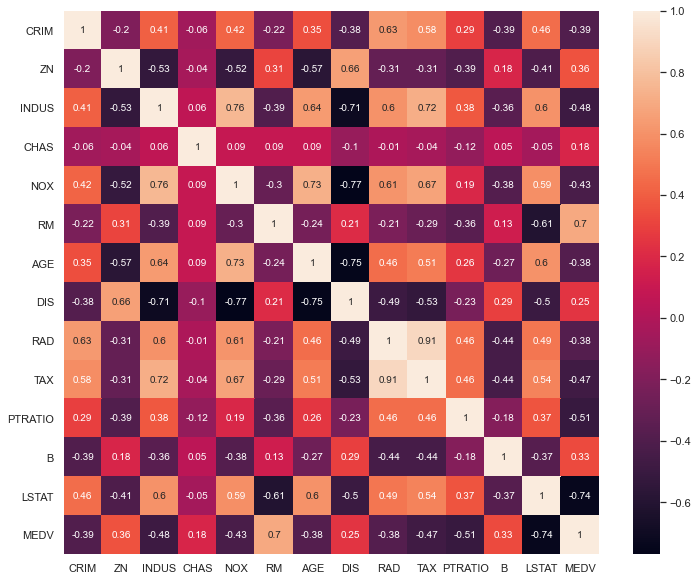

In [20]:
# We want to start with a univariate linear regression 
# I calculate the correlation matrix 
# to find independent variables that has strong
# postive and negative correlation with the target variable
# As a matter of fact, the coefficient a (slop) in the ax + b= y
# is exactly the correlation between x and y.
correlation_matrix = boston_df.corr().round(2)
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

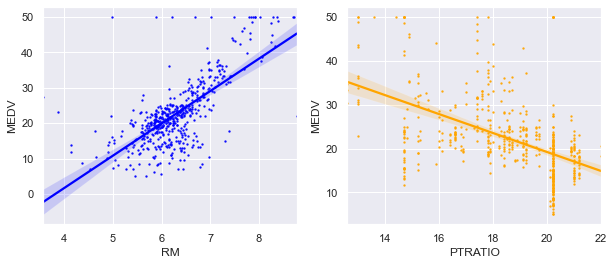

In [21]:
# In fact, seaborn can add linear regression line
# to scatter plot. 
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

p_rm = sns.regplot(
    data=boston_df, x='RM', y='MEDV', 
    ax=axes[0], 
    scatter_kws={'color': 'blue', 's': 2}, 
    line_kws={'color': 'blue'}
)
p_pt = sns.regplot(
    data=boston_df, x='PTRATIO', y='MEDV', 
    ax=axes[1], 
    scatter_kws={'color': 'orange', 's': 2}, 
    line_kws={'color': 'orange'}
)